# Exploratory Data Analysis

### Getting ready

Importing libraries

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Image
import ast
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset

In [2]:
df = pd.read_csv(r'..\datasets\dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87687 entries, 0 to 87686
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         87687 non-null  object 
 1   author        87687 non-null  object 
 2   desc          87687 non-null  object 
 3   genre         87687 non-null  object 
 4   rating        87687 non-null  float64
 5   reviews       87687 non-null  int64  
 6   totalratings  87687 non-null  int64  
 7   pages         87687 non-null  int64  
 8   img           87687 non-null  object 
 9   link          87687 non-null  object 
 10  isbn          87687 non-null  object 
 11  score         87687 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 8.0+ MB


In [4]:
df.head()

,title,author,desc,genre,rating,reviews,totalratings,pages,img,link,isbn,score
0,Between Two Fires: American Indians in the Civ...,['Laurence M. Hauptman'],Reveals that several hundred thousand Indians ...,"['History', 'Military History', 'Civil War', '...",3.52,5,33,0,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001053.Betwee...,002914180X,0.0
1,Fashion Sourcebook 1920s,"['Charlotte Fiell', 'Emmanuelle Dirix']",Fashion Sourcebook - 1920s is the first book i...,"['Couture', 'Fashion', 'Historical', 'Art', 'N...",4.51,6,41,576,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/10010552-fashi...,1906863482,0.0
2,Hungary 56,['Andy Anderson'],The seminal history and analysis of the Hungar...,"['Politics', 'History']",4.15,2,26,124,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001077.Hungar...,948984147,0.0
3,All-American Anarchist: Joseph A. Labadie and ...,['Carlotta R. Anderson'],"""All-American Anarchist"" chronicles the life a...","['Labor', 'History']",3.83,1,6,324,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/1001079.All_Am...,814327079,0.0
4,Les oiseaux gourmands,['Jean Leveille'],"Aujourdhui, loiseau nous invite sa table, tab...",[],4.00,1,1,177,https://i.gr-assets.com/images/S/compressed.ph...,https://goodreads.com/book/show/10010880-les-o...,2761920813,0.0


### EDA

Utils functions

In [5]:
def display_books_info(books: pd.DataFrame) -> None:
    """
    Takes a `books` dataframe and displays each book's title, author, link and image.
    """
    for index, row in books.iterrows():
        print(f"Title: {row['title']}")
        if type(row['author']) == list:
            print(f"Author: {", ".join(row['author'])}")
        else:
            print(f"Author: {", ".join(ast.literal_eval(row['author']))}")
        print(f"Pages: {row['pages']}")
        print(f"Link: {row['link']}")
        display(Image(url=row['img'], width=200, height=300))
        print("\n")
    

Most Rated Books

In [6]:
most_rated_books = df.sort_values(by='score', ascending=False).head()
display_books_info(most_rated_books)

Title: The Fault in Our Stars
Author: John Green
Pages: 313
Link: https://goodreads.com/book/show/11870085-the-fault-in-our-stars




Title: Harry Potter and the Deathly Hallows
Author: J.K. Rowling
Pages: 759
Link: https://goodreads.com/book/show/136251.Harry_Potter_and_the_Deathly_Hallows




Title: Harry Potter and the Chamber of Secrets
Author: J.K. Rowling, Mary GrandPrÃ©
Pages: 341
Link: https://goodreads.com/book/show/15881.Harry_Potter_and_the_Chamber_of_Secrets




Title: Divergent
Author: Veronica Roth
Pages: 487
Link: https://goodreads.com/book/show/13335037-divergent




Title: Animal Farm
Author: George Orwell, Russell Baker, C.M. Woodhouse
Pages: 141
Link: https://goodreads.com/book/show/170448.Animal_Farm


Most Popular Books

In [7]:
most_popular_books = df.sort_values(by='totalratings', ascending=False).head()
display_books_info(most_popular_books)

Title: The Fault in Our Stars
Author: John Green
Pages: 313
Link: https://goodreads.com/book/show/11870085-the-fault-in-our-stars




Title: Divergent
Author: Veronica Roth
Pages: 487
Link: https://goodreads.com/book/show/13335037-divergent




Title: Harry Potter and the Deathly Hallows
Author: J.K. Rowling
Pages: 759
Link: https://goodreads.com/book/show/136251.Harry_Potter_and_the_Deathly_Hallows




Title: Animal Farm
Author: George Orwell, Russell Baker, C.M. Woodhouse
Pages: 141
Link: https://goodreads.com/book/show/170448.Animal_Farm




Title: Harry Potter and the Chamber of Secrets
Author: J.K. Rowling, Mary GrandPrÃ©
Pages: 341
Link: https://goodreads.com/book/show/15881.Harry_Potter_and_the_Chamber_of_Secrets


Authors with Most Books written

In [8]:
df['author'] = df['author'].apply(lambda x: ast.literal_eval(x))

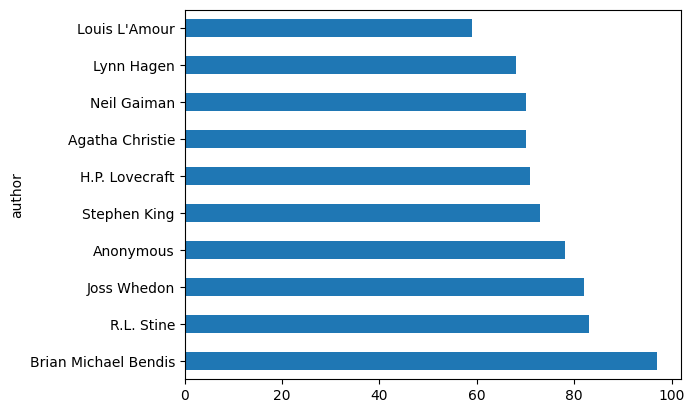

In [9]:
df.explode('author').groupby('author')['title'].count().sort_values(ascending=False).head(10).plot.barh();

Most Successful Authors (by `score`)

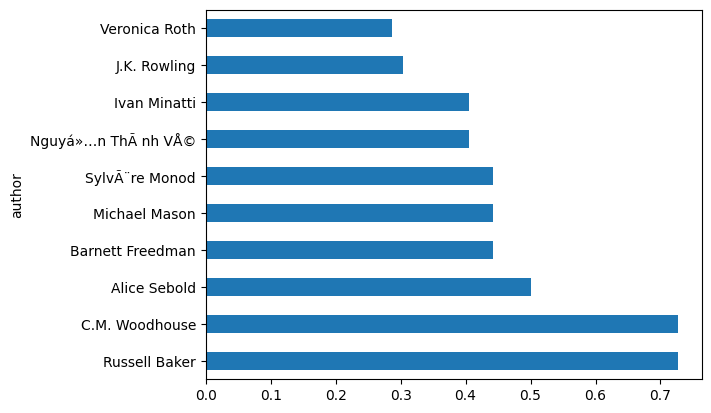

In [10]:
df.explode('author').groupby('author')['score'].mean().sort_values(ascending=False).head(10).plot.barh();

Most Popular Genre

In [11]:
df['genre'].fillna('[]', inplace=True)
df['genre'] = df['genre'].apply(lambda x: ast.literal_eval(x))

C:\Users\Ruslan\AppData\Local\Temp\ipykernel_8808\3099324714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].fillna('[]', inplace=True)


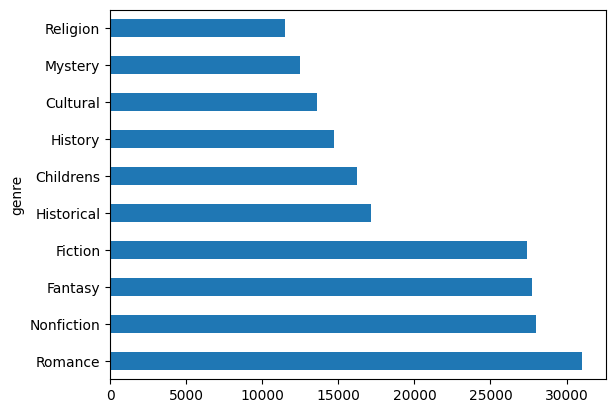

In [12]:
df.explode('genre').groupby('genre')['title'].count().sort_values(ascending=False).head(10).plot.barh();

Books with Most Pages

In [13]:
display_books_info(df.sort_values(by='pages', ascending=False).head())

Title: Assisting the Traumatized Soul: Healing the Wounded Talisman
Author: Phyllis Peterson
Pages: 70000
Link: https://goodreads.com/book/show/1207704.Assisting_the_Traumatized_Soul




Title: Encyclopaedia Britannica (Set)
Author: EncyclopÃ¦dia Britannica
Pages: 32000
Link: https://goodreads.com/book/show/1601986.Encyclopaedia_Britannica




Title: The Complete Works of Charles Dickens
Author: Charles Dickens
Pages: 21723
Link: https://goodreads.com/book/show/11523199-the-complete-works-of-charles-dickens




Title: Works of Honore de Balzac
Author: HonorÃ© de Balzac
Pages: 15918
Link: https://goodreads.com/book/show/17158707-works-of-honore-de-balzac




Title: Encyclopedia of Language and Linguistics, 14-Volume Set: V1-14
Author: Keith Brown
Pages: 9000
Link: https://goodreads.com/book/show/1183973.Encyclopedia_of_Language_and_Linguistics_14_Volume_Set


Book with most Reviews

In [14]:
display_books_info(df.sort_values(by='reviews', ascending=False).head())

Title: The Fault in Our Stars
Author: John Green
Pages: 313
Link: https://goodreads.com/book/show/11870085-the-fault-in-our-stars




Title: Divergent
Author: Veronica Roth
Pages: 487
Link: https://goodreads.com/book/show/13335037-divergent




Title: Fifty Shades of Grey
Author: E.L. James
Pages: 356
Link: https://goodreads.com/book/show/10818853-fifty-shades-of-grey




Title: Harry Potter and the Deathly Hallows
Author: J.K. Rowling
Pages: 759
Link: https://goodreads.com/book/show/136251.Harry_Potter_and_the_Deathly_Hallows




Title: Eleanor & Park
Author: Rainbow Rowell
Pages: 328
Link: https://goodreads.com/book/show/15745753-eleanor-park
